In [1]:
import pandas as pd
import new_lib as nl
import wrangle as w
import acquire as a
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta


In [2]:
amzn_df = a.get_data('amzn')
appl_df = a.get_data('appl')
nflx_df = a.get_data('nflx')
googl_df = a.get_data('googl')
# Acquiring data

In [3]:
amzn_df = w.wrangle_data('amzn')
appl_df = w.wrangle_data('appl')
nflx_df = w.wrangle_data('nflx')
googl_df = w.wrangle_data('googl')
# wrangling data

In [4]:
am_train, am_val, am_test = w.split_data(amzn_df)
ap_train, ap_val, ap_test = w.split_data(appl_df)
nflx_train, nflx_val, nflx_test = w.split_data(nflx_df)
googl_train, googl_val, googl_test = w.split_data(googl_df)
# Splitting data

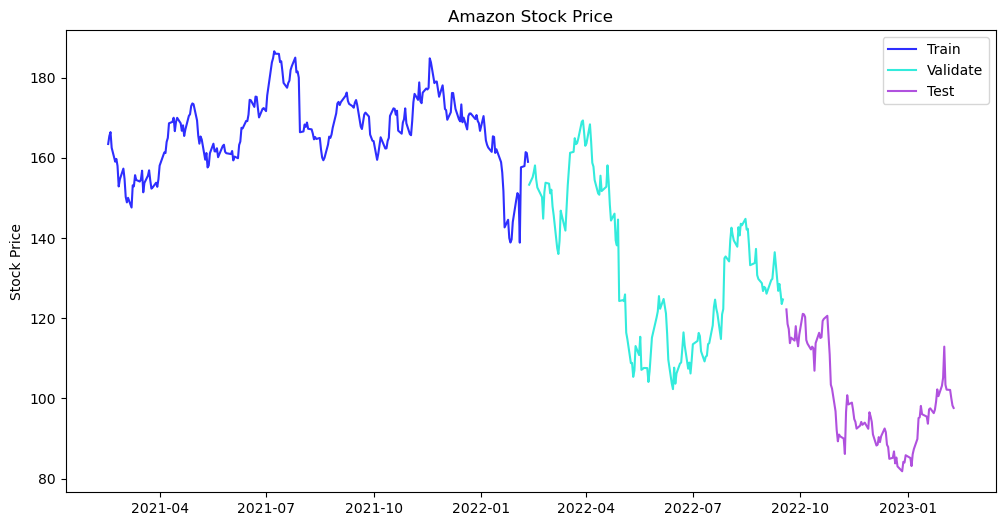

In [5]:
plt.figure(figsize=(12,6))
plt.plot(am_train.c, color='#2E2EFE', label = 'Train')
plt.plot(am_val.c, color='#33EBDC', label = 'Validate')
plt.plot(am_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Amazon Stock Price')
plt.show()
## Plotting the data to observe closing prices

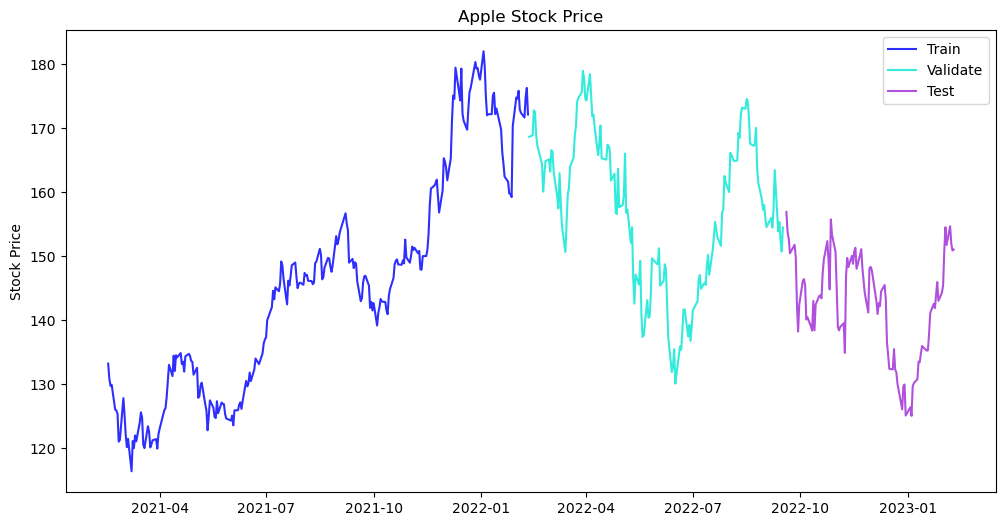

In [6]:
plt.figure(figsize=(12,6))
plt.plot(ap_train.c, color='#2E2EFE', label = 'Train')
plt.plot(ap_val.c, color='#33EBDC', label = 'Validate')
plt.plot(ap_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Apple Stock Price')
plt.show()
## Plotting the data to observe closing prices

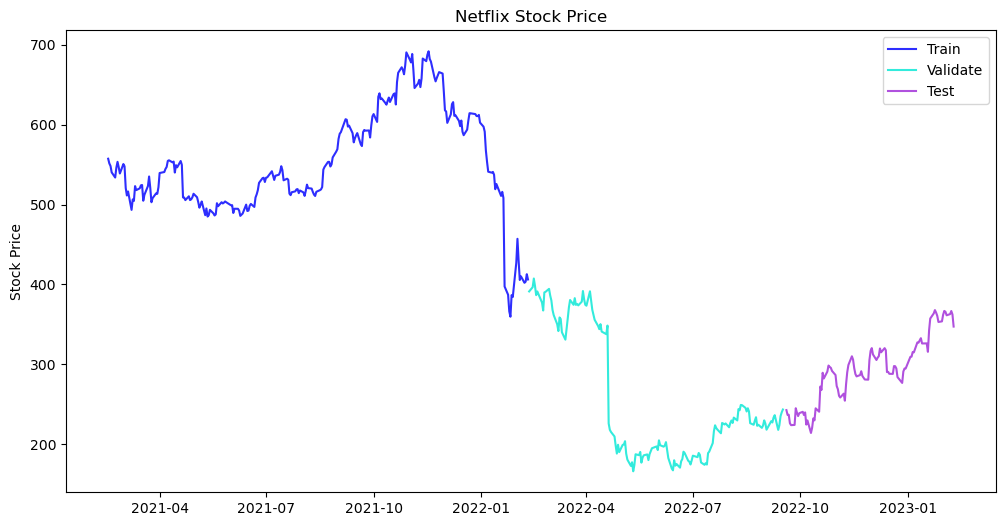

In [7]:
plt.figure(figsize=(12,6))
plt.plot(nflx_train.c, color='#2E2EFE', label = 'Train')
plt.plot(nflx_val.c, color='#33EBDC', label = 'Validate')
plt.plot(nflx_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Netflix Stock Price')
plt.show()
## Plotting the data to observe closing prices

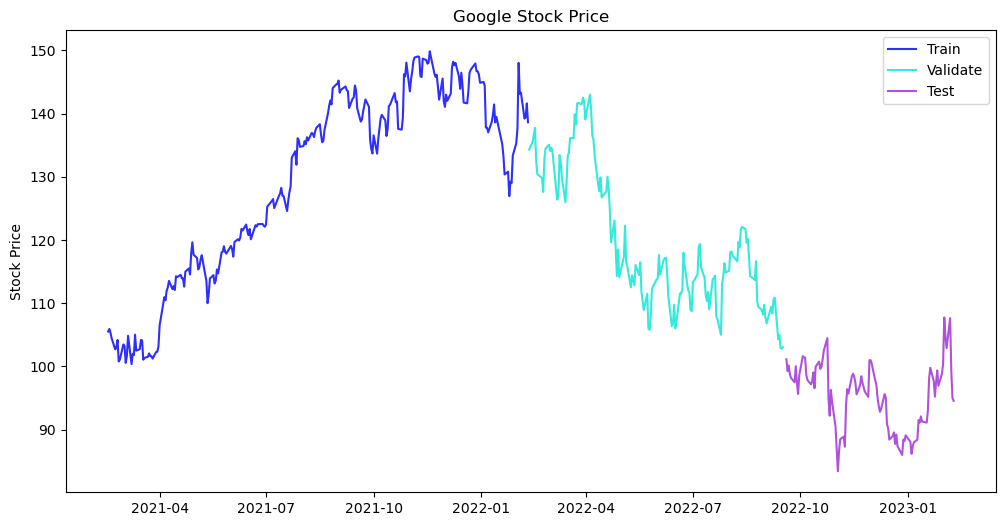

In [8]:
plt.figure(figsize=(12,6))
plt.plot(googl_train.c, color='#2E2EFE', label = 'Train')
plt.plot(googl_val.c, color='#33EBDC', label = 'Validate')
plt.plot(googl_test.c, color='#B051DE', label = 'Test')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.show()
## Plotting the data to observe closing prices

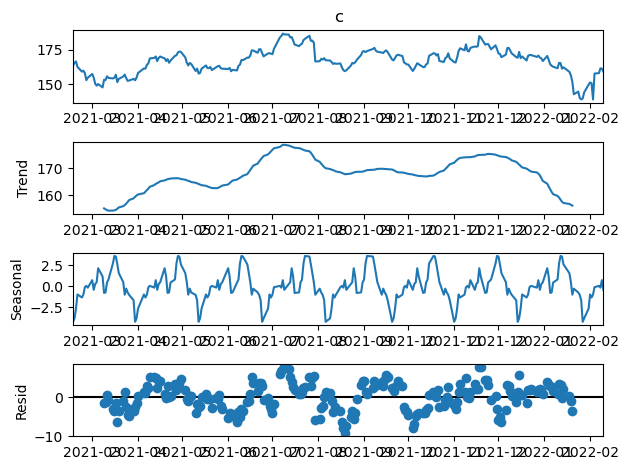

In [9]:
sm.tsa.seasonal_decompose(am_train['c'], period = 30).plot()
None
#creating a sesonal decomp to check trends and remove noise

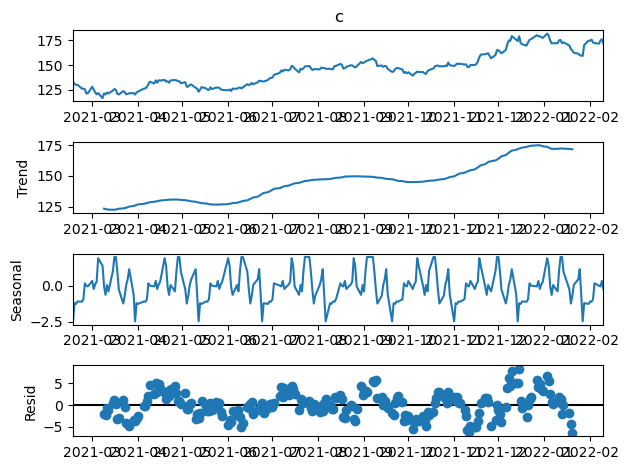

In [10]:
sm.tsa.seasonal_decompose(ap_train['c'], period = 30).plot()
None

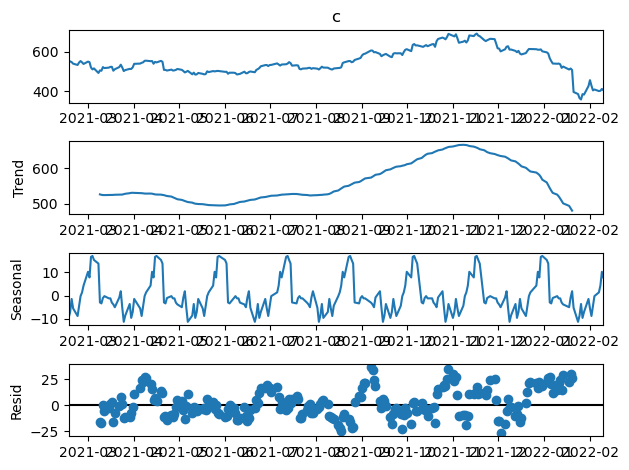

In [11]:
sm.tsa.seasonal_decompose(nflx_train['c'], period = 30).plot()
None

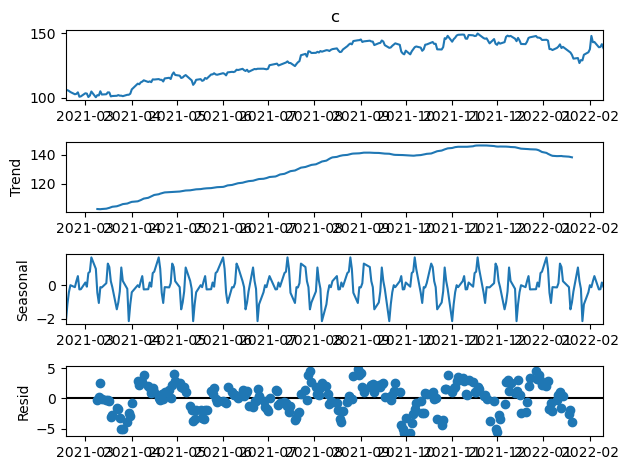

In [12]:
sm.tsa.seasonal_decompose(googl_train['c'], period = 30).plot()
None

In [13]:
# preds_am = am_val.rolling(30).mean()
# preds_am = pd.DataFrame(preds_am, index = am_val.index, columns = {'c'})
# Failed attempt

In [14]:
def evaluate(target, preds, val):
    '''
    Fast way to find RMSE for models
    '''
    rmse = round(sqrt(mean_squared_error(val[target], preds[target])), 0)
    return rmse
# Function to evaluate rmse of a model


def plot_and_eval(target, preds, train, val, stock):
    '''
This function will plot and evaluate a model using target predicitons from a dataset and return a graph of the data
It will also calculate the rmse of the data and report that along with the data
    '''
    plt.figure(figsize = (14,6))
    plt.plot(train[target], label='Train', linewidth=1, color='#2E2EFE')
    plt.plot(val[target], label='Validate', linewidth=1, color='#33EBDC')
    plt.plot(preds[target], label='predictions', linewidth=2, color='#EF080C')
    plt.legend()
    plt.title(f'{stock} Stock Price')
    rmse = evaluate(target, preds.iloc[29:], val.iloc[29:])
    print(stock , '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
# Plot the model and state Rmse

In [15]:
# plot_and_eval('c', preds_am, am_train, am_val)
# Did not produce desired results

Amazon -- RMSE: 42


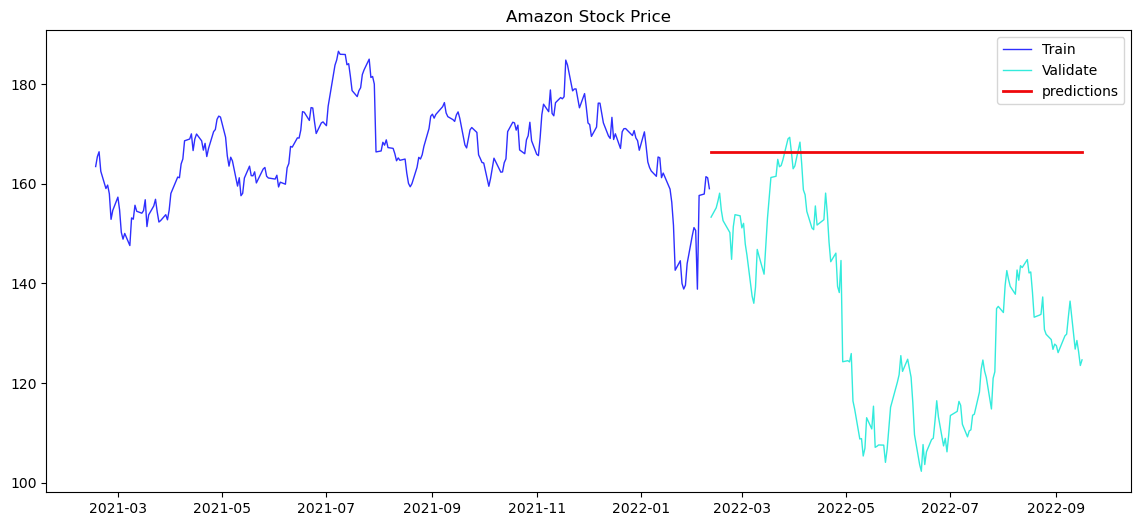

In [16]:
base_am = am_train.c.mean()
base_am = pd.DataFrame(base_am, columns = {'c'}, index = am_val.index)
plot_and_eval('c', base_am, am_train, am_val, 'Amazon')
# creating baselines

Apple -- RMSE: 16


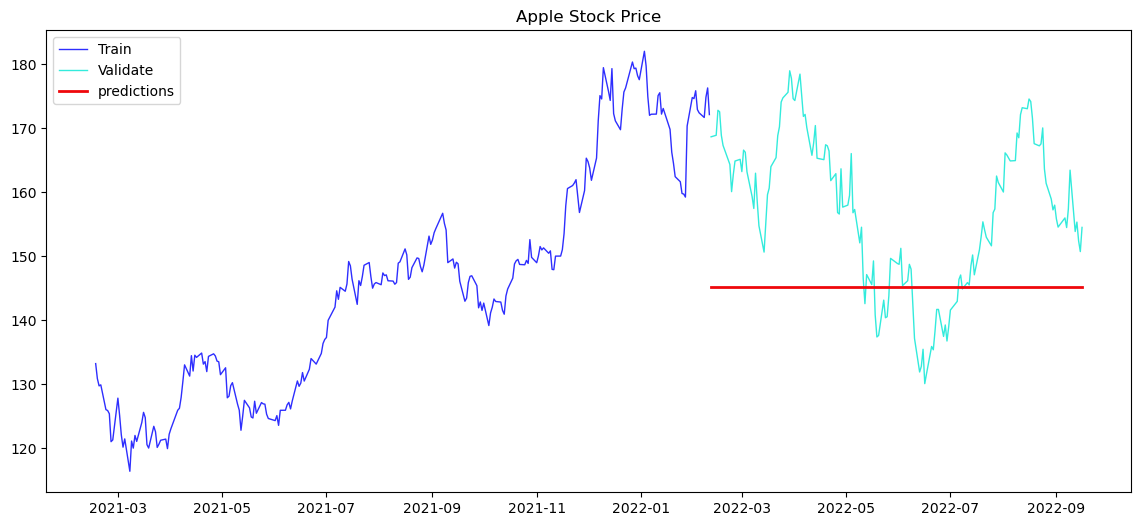

In [17]:
base_ap = ap_train.c.mean()
base_ap = pd.DataFrame(base_ap, columns = {'c'}, index = ap_val.index)
plot_and_eval('c', base_ap, ap_train, ap_val, 'Apple')

Netflix -- RMSE: 329


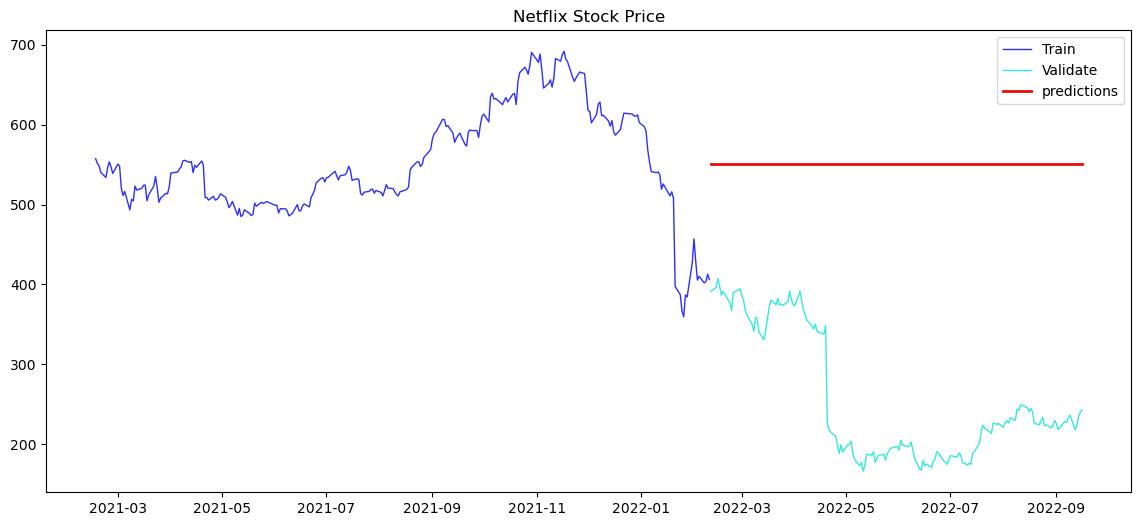

In [18]:
base_nflx = nflx_train.c.mean()
base_nflx = pd.DataFrame(base_nflx, columns = {'c'}, index = nflx_val.index)
plot_and_eval('c', base_nflx, nflx_train, nflx_val, 'Netflix')

Google -- RMSE: 16


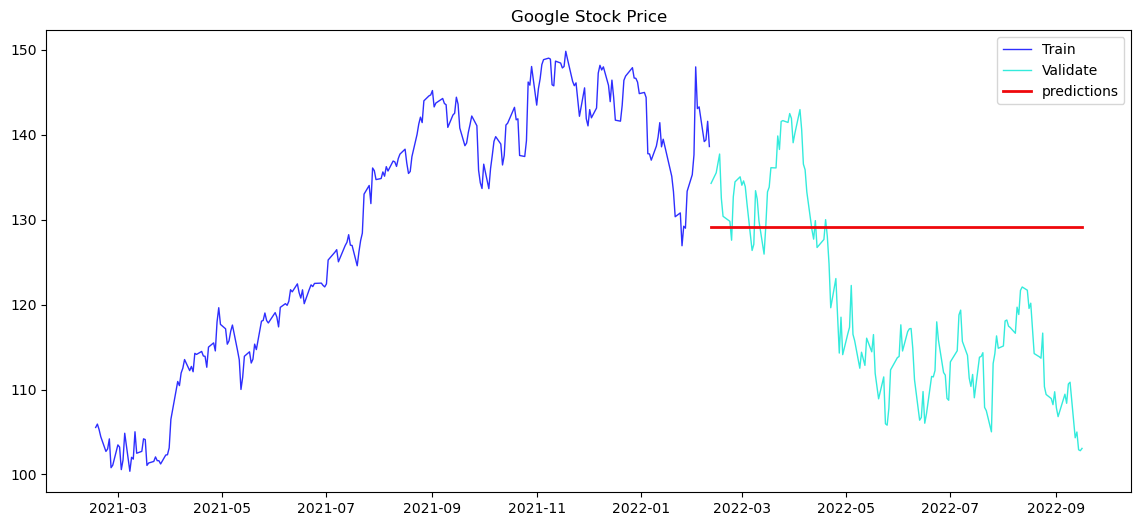

In [19]:
base_googl = googl_train.c.mean()
base_googl = pd.DataFrame(base_googl, columns = {'c'}, index = am_val.index)
plot_and_eval('c', base_googl, googl_train, googl_val, 'Google')

In [20]:
am_preds = am_val.c.rolling(30).mean()
am_preds = pd.DataFrame(am_preds, columns = {'c'}, index = am_val.index)
am_preds

,c
Date,
2022-02-11,NaN
2022-02-14,NaN
2022-02-15,NaN
2022-02-16,NaN
2022-02-17,NaN
...,...
2022-09-12,135.433333
2022-09-13,135.246333
2022-09-14,134.805000


Amazon -- RMSE: 15


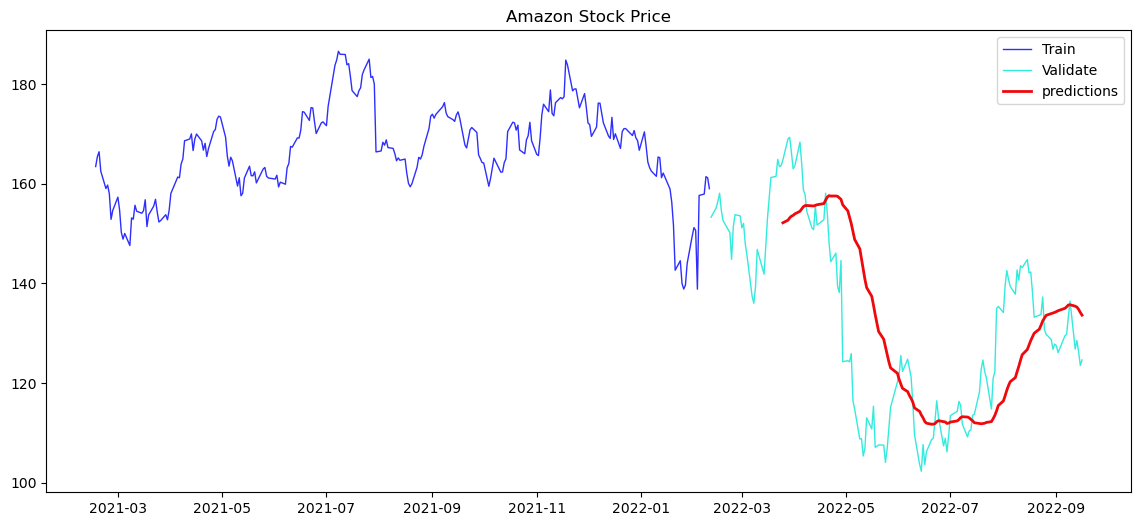

In [21]:
plot_and_eval('c', am_preds, am_train, am_val, 'Amazon')

In [22]:
ap_preds = ap_val.c.rolling(30).mean()
ap_preds = pd.DataFrame(ap_preds, columns = {'c'}, index = ap_val.index)

Apple -- RMSE: 10


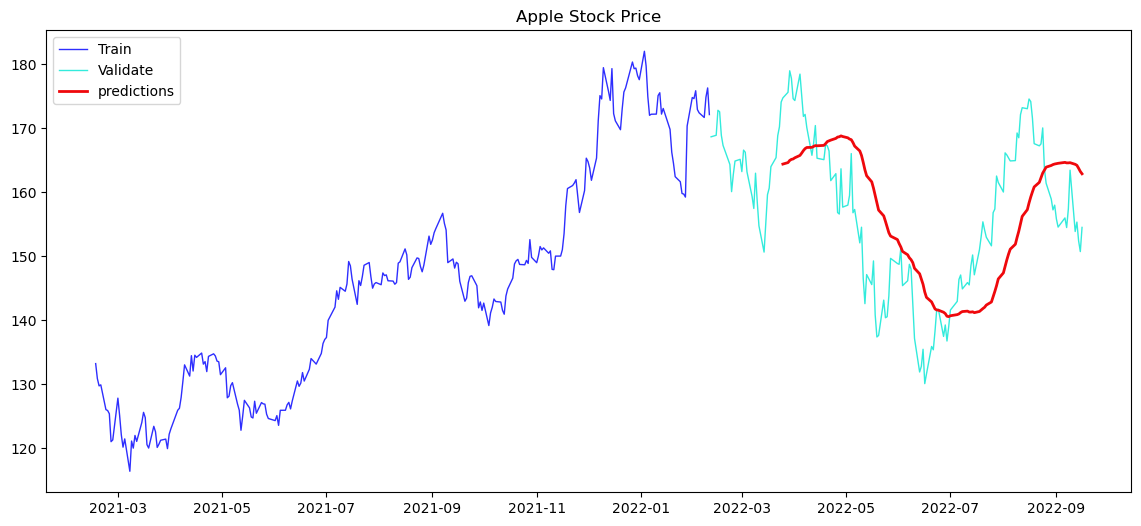

In [23]:
plot_and_eval('c', ap_preds, ap_train, ap_val, 'Apple')

Netflix -- RMSE: 51


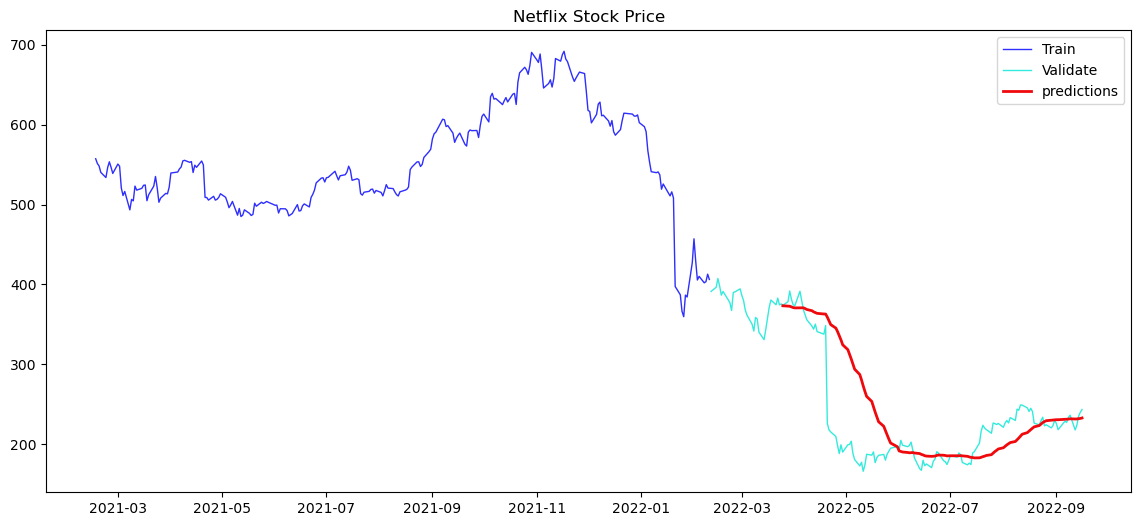

In [24]:
nflx_preds = nflx_val.c.rolling(30).mean()
nflx_preds = pd.DataFrame(nflx_preds, columns = {'c'}, index = nflx_val.index)
plot_and_eval('c', nflx_preds, nflx_train, nflx_val, 'Netflix')

Google -- RMSE: 7


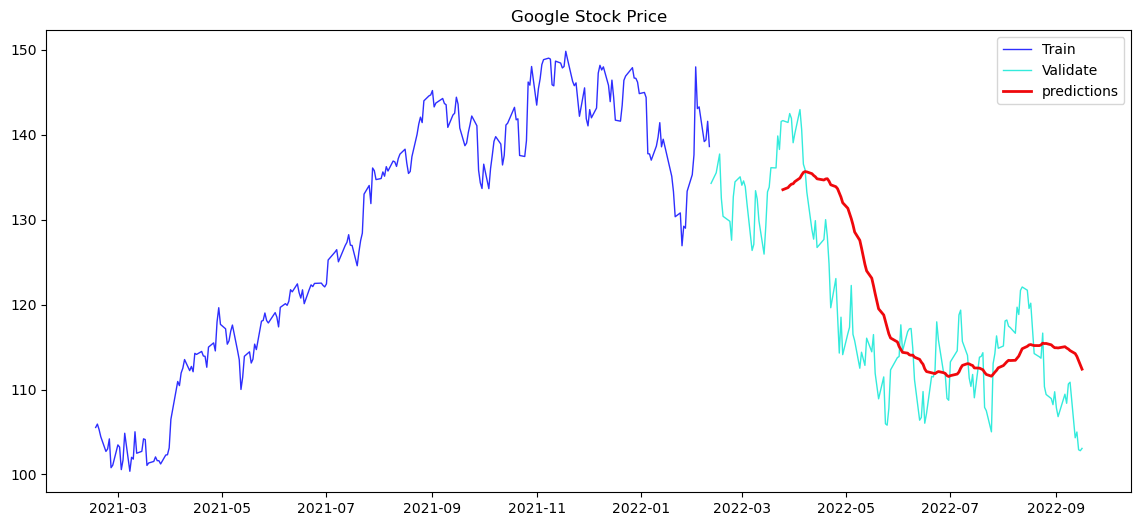

In [25]:
googl_preds = googl_val.c.rolling(30).mean()
googl_preds = pd.DataFrame(googl_preds, columns = {'c'}, index = googl_val.index)
plot_and_eval('c', googl_preds, googl_train, googl_val, 'Google')

In [26]:
holt1 = Holt(am_train.c, exponential = True, damped = True)
holt1 = holt1.fit(optimized = True)
preds = holt1.forecast(len(am_val))
preds
# Creating a Holts prediction

251    159.054458
252    159.054458
253    159.054458
254    159.054458
255    159.054458
          ...    
397    159.054458
398    159.054458
399    159.054458
400    159.054458
401    159.054458
Length: 151, dtype: float64

In [27]:
am_val.c.index[0]

Timestamp('2022-02-11 00:00:00')

In [28]:
am_arima = ARIMA(am_train.c, order = (30,2,5))

In [29]:
am_fit = am_arima.fit()

In [30]:
am_arima = am_fit.forecast(len(am_val))
am_aripred = pd.DataFrame({'c': am_arima, 'dates': am_val.index})
am_aripred = am_aripred.set_index('dates')
am_aripred

,c
dates,
2022-02-11,158.630055
2022-02-14,160.780632
2022-02-15,161.500597
2022-02-16,164.956835
2022-02-17,164.047361
...,...
2022-09-12,160.421317
2022-09-13,161.213468
2022-09-14,161.350912


Amazon -- RMSE: 38


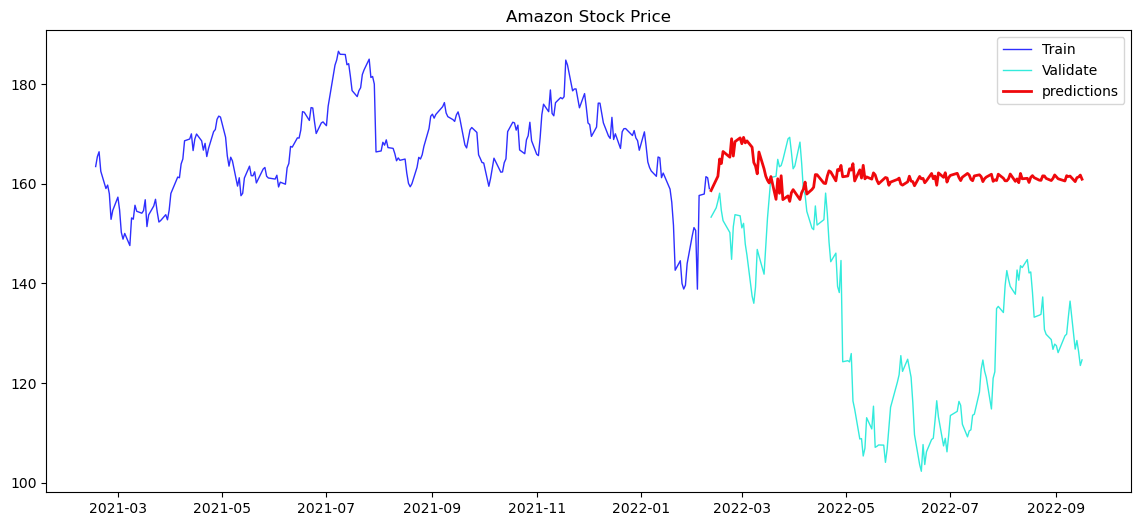

In [31]:
plot_and_eval('c', am_aripred, am_train, am_val, 'Amazon')

In [32]:
season_fit1 = ExponentialSmoothing(ap_train.c, seasonal_periods=30, trend='mul', seasonal='add').fit()
season_fit2 = ExponentialSmoothing(ap_train.c, seasonal_periods=30, trend='mul', seasonal='mul').fit()
season_fit3 = ExponentialSmoothing(ap_train.c, seasonal_periods=30, trend='mul', seasonal='add', damped=True).fit()
season_fit4 = ExponentialSmoothing(ap_train.c, seasonal_periods=30, trend ='mul', seasonal='mul', damped =True).fit()

In [33]:
results_temp=pd.DataFrame({'model':['season_fit1', 'season_fit2', 'season_fit3', 'season_fit4'],
                              'RMSE':[sqrt(season_fit1.sse/len(ap_train)), sqrt(season_fit2.sse/len(ap_train)), sqrt(season_fit3.sse/len(ap_train)), sqrt(season_fit4.sse/len(ap_train))]})
results_temp.sort_values(by = 'RMSE')

,model,RMSE
3,season_fit4,2.069296
1,season_fit2,2.092240
0,season_fit1,2.106755
2,season_fit3,2.350897


In [34]:
preds = pd.DataFrame({'c': season_fit4.forecast(ap_val.shape[0]), 'dates': ap_val.index})
preds = preds.set_index('dates')
preds

,c
dates,
2022-02-11,172.013631
2022-02-14,171.983072
2022-02-15,174.007170
2022-02-16,172.744856
2022-02-17,171.967503
...,...
2022-09-12,171.606682
2022-09-13,172.228944
2022-09-14,173.474007


Apple -- RMSE: 20


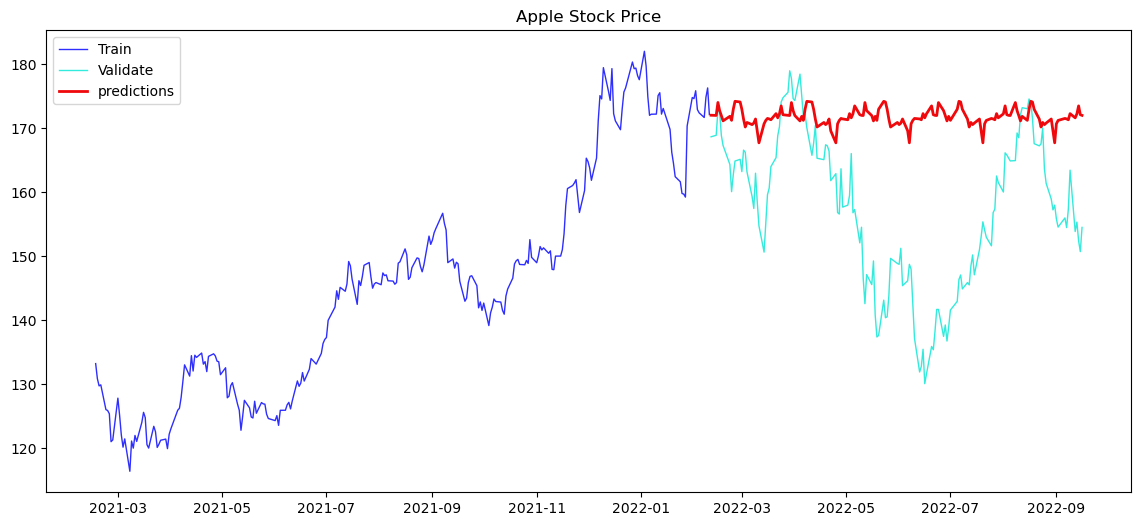

In [35]:
plot_and_eval('c', preds, ap_train, ap_val, 'Apple')

In [36]:
preds = am_fit.forecast(am_val.shape[0] + am_test.shape[0] + 200)
preds

251    158.630055
252    160.780632
253    161.500597
254    164.956835
255    164.047361
          ...    
697    161.239650
698    161.303714
699    161.344541
700    161.427662
701    161.352711
Name: predicted_mean, Length: 451, dtype: float64

In [37]:
startDate = datetime(2022, 9, 19)
endDate = datetime(2024, 2, 11)

In [38]:
ari_dates = pd.date_range(startDate,endDate-timedelta(days=1),freq='d')
ari_dates = ari_dates[ari_dates.dayofweek < 5]
len(ari_dates)

365

In [39]:
len(am_test)

100

In [ ]:
am_test.index[0]

In [41]:
train_size = int(round(amzn_df.shape[0] * 0.8))
ar1_train = amzn_df[:train_size]
ar1_test = amzn_df[train_size:]

In [42]:
arima = ARIMA(ar1_train.c, order = (30,2,5))

In [43]:
fit = arima.fit()

In [44]:
ar1_preds = fit.forecast(ar1_test.shape[0] + 265)

In [46]:
ar1_df = pd.DataFrame({'c': ar1_preds, 'dates': ari_dates})
ar1_df = ar1_df.set_index('dates')

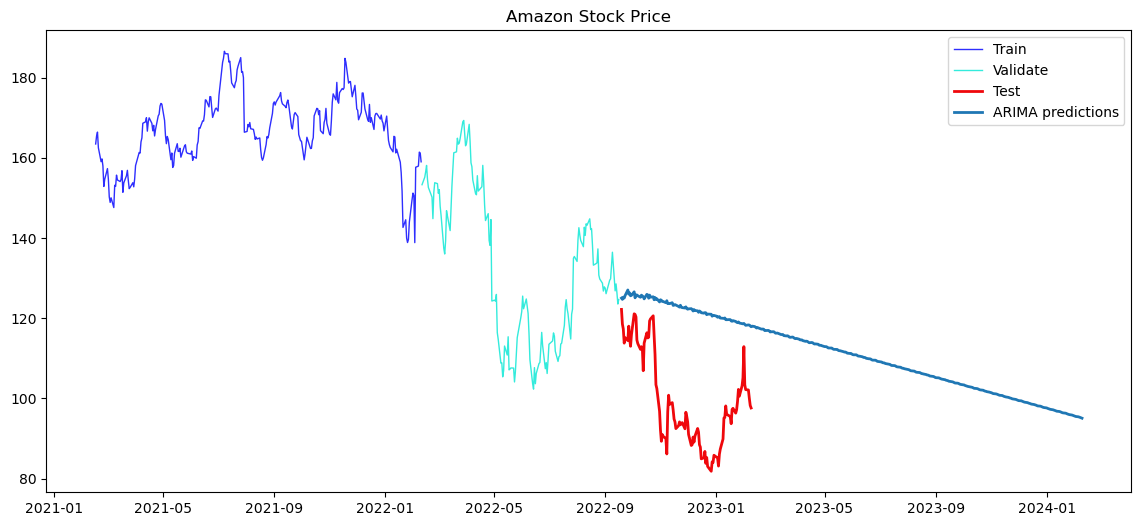

In [48]:
stock = 'Amazon'
plt.figure(figsize = (14,6))
plt.plot(am_train['c'], label='Train', linewidth=1, color='#2E2EFE')
plt.plot(am_val['c'], label='Validate', linewidth=1, color='#33EBDC')
plt.plot(am_test['c'], label='Test', linewidth=2, color='#EF080C')
plt.plot(ar1_df['c'], label = 'ARIMA predictions', linewidth = 2)
plt.legend()
plt.title(f'{stock} Stock Price')
plt.show()

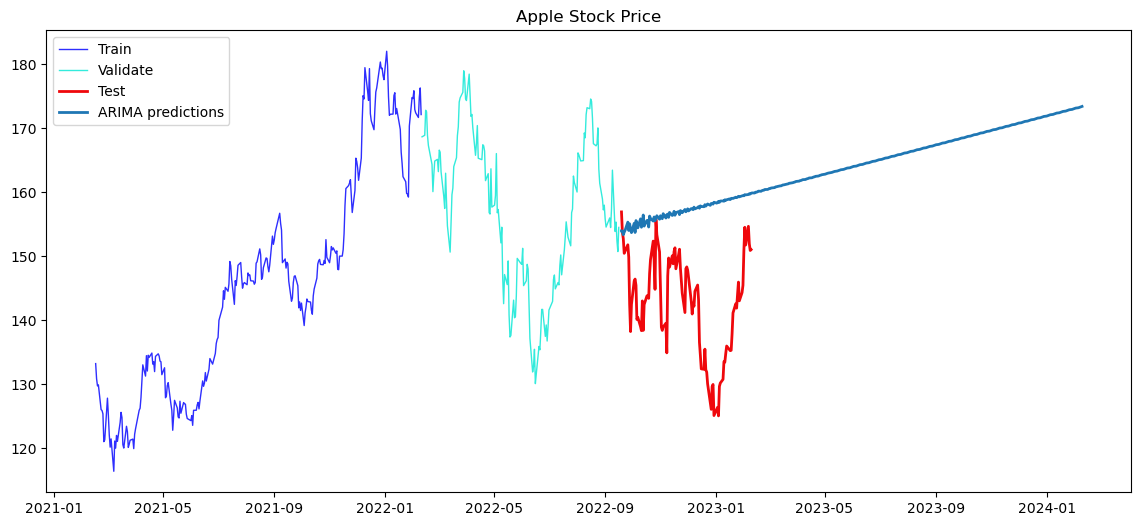

In [50]:
ar2_train = appl_df[:train_size]
ar2_test = appl_df[train_size:]
arima = ARIMA(ar2_train.c, order = (30,2,5))
fit = arima.fit()
ar2_preds = fit.forecast(ar2_test.shape[0] + 265)
ar2_df = pd.DataFrame({'c': ar2_preds, 'dates': ari_dates})
ar2_df = ar2_df.set_index('dates')
stock = 'Apple'
plt.figure(figsize = (14,6))
plt.plot(ap_train['c'], label='Train', linewidth=1, color='#2E2EFE')
plt.plot(ap_val['c'], label='Validate', linewidth=1, color='#33EBDC')
plt.plot(ap_test['c'], label='Test', linewidth=2, color='#EF080C')
plt.plot(ar2_df['c'], label = 'ARIMA predictions', linewidth = 2)
plt.legend()
plt.title(f'{stock} Stock Price')
plt.show()

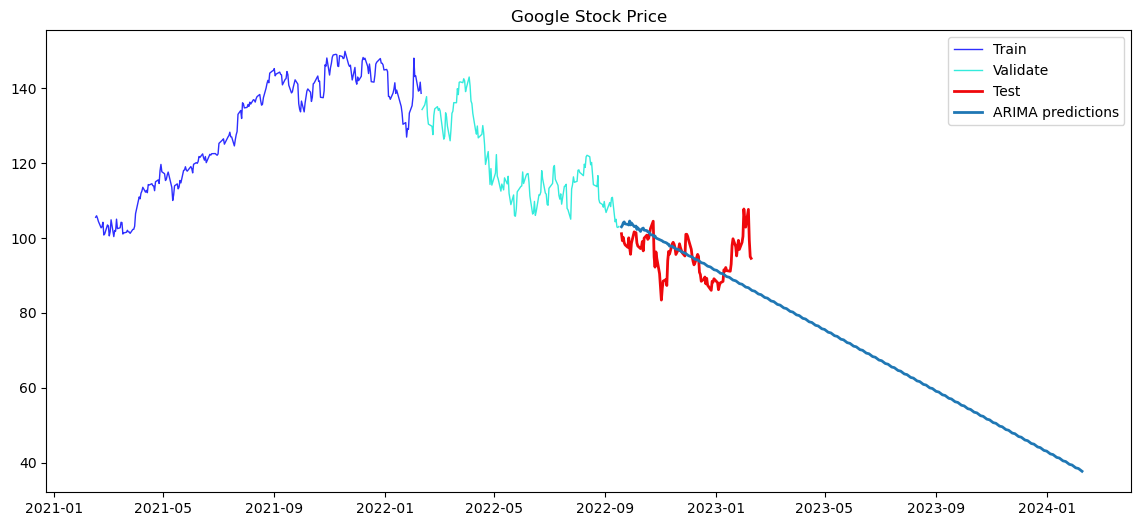

In [51]:
ar3_train = googl_df[:train_size]
ar3_test = googl_df[train_size:]
arima = ARIMA(ar3_train.c, order = (30,2,5))
fit = arima.fit()
ar3_preds = fit.forecast(ar3_test.shape[0] + 265)
ar3_df = pd.DataFrame({'c': ar3_preds, 'dates': ari_dates})
ar3_df = ar3_df.set_index('dates')
stock = 'Google'
plt.figure(figsize = (14,6))
plt.plot(googl_train['c'], label='Train', linewidth=1, color='#2E2EFE')
plt.plot(googl_val['c'], label='Validate', linewidth=1, color='#33EBDC')
plt.plot(googl_test['c'], label='Test', linewidth=2, color='#EF080C')
plt.plot(ar3_df['c'], label = 'ARIMA predictions', linewidth = 2)
plt.legend()
plt.title(f'{stock} Stock Price')
plt.show()

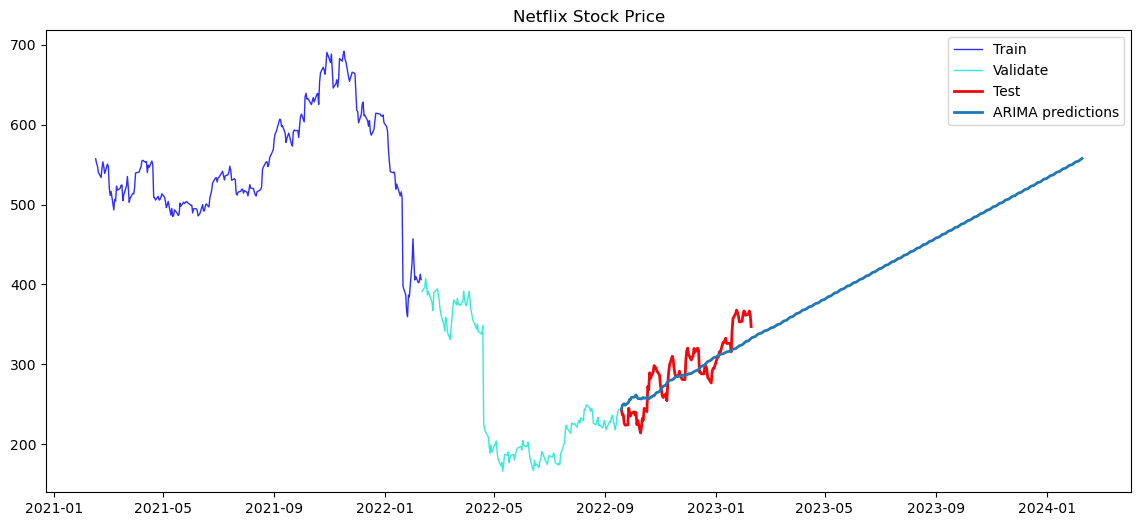

In [53]:
ar4_train = nflx_df[:train_size]
ar4_test = nflx_df[train_size:]
arima = ARIMA(ar4_train.c, order = (30,2,5))
fit = arima.fit()
ar4_preds = fit.forecast(ar4_test.shape[0] + 265)
ar4_df = pd.DataFrame({'c': ar4_preds, 'dates': ari_dates})
ar4_df = ar4_df.set_index('dates')
stock = 'Netflix'
plt.figure(figsize = (14,6))
plt.plot(nflx_train['c'], label='Train', linewidth=1, color='#2E2EFE')
plt.plot(nflx_val['c'], label='Validate', linewidth=1, color='#33EBDC')
plt.plot(nflx_test['c'], label='Test', linewidth=2, color='#EF080C')
plt.plot(ar4_df['c'], label = 'ARIMA predictions', linewidth = 2)
plt.legend()
plt.title(f'{stock} Stock Price')
plt.show()